# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing

### Load the dataset into a pandas DataFrame

In [2]:
file_path = 'GlobalWeatherRepository.csv'  
df = pd.read_csv(file_path)

### Display the first few rows

In [3]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1        

### Display Dataset Information

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31071 entries, 0 to 31070
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       31071 non-null  object 
 1   location_name                 31071 non-null  object 
 2   latitude                      31071 non-null  float64
 3   longitude                     31071 non-null  float64
 4   timezone                      31071 non-null  object 
 5   last_updated_epoch            31071 non-null  int64  
 6   last_updated                  31071 non-null  object 
 7   temperature_celsius           31071 non-null  float64
 8   temperature_fahrenheit        31071 non-null  float64
 9   condition_text                31071 non-null  object 
 10  wind_mph                      31071 non-null  float64
 11  wind_kph                      31071 non-null  float64
 12  wind_degree                   31071 non-null  int64  
 13  w

### Missing Value Checking

In [5]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozon

### Convert columns to appropriate data types

In [6]:
df['temperature_celsius'] = pd.to_numeric(df['temperature_celsius'], errors='coerce')
df['humidity'] = pd.to_numeric(df['humidity'], errors='coerce')

### Save the cleaned dataset 

In [7]:
df.to_csv('Cleaned_GlobalWeather.csv', index=False)

### Display a summary of key statistics

In [8]:
print("\nSummary statistics for key weather attributes:")
print(df[['temperature_celsius', 'humidity', 'precip_mm', 'wind_mph']].describe())


Summary statistics for key weather attributes:
       temperature_celsius      humidity     precip_mm      wind_mph
count         31071.000000  31071.000000  31071.000000  31071.000000
mean             25.626250     61.191915      0.159801      8.543063
std               7.212115     25.023737      0.658339     11.678009
min             -10.400000      2.000000      0.000000      2.200000
25%              22.000000     42.000000      0.000000      4.300000
50%              26.400000     66.000000      0.000000      7.600000
75%              29.800000     82.000000      0.040000     11.900000
max              49.200000    100.000000     27.820000   1841.200000


# Data Analytics and Visualization

## 1. Generate a summary of the top 5 hottest and coldest locations globally 

In [9]:
top_5_hottest = df.nlargest(5, 'temperature_celsius')[['location_name', 'temperature_celsius']]
top_5_coldest = df.nsmallest(5, 'temperature_celsius')[['location_name', 'temperature_celsius']]

In [10]:
print("\nTop 5 hottest locations globally:")
print(top_5_hottest)


Top 5 hottest locations globally:
      location_name  temperature_celsius
6896    Kuwait City                 49.2
7460        Baghdad                 49.1
11145       Baghdad                 49.1
8425    Kuwait City                 48.9
11338       Baghdad                 48.8


In [11]:
print("\nTop 5 coldest locations globally:")
print(top_5_coldest)


Top 5 coldest locations globally:
      location_name  temperature_celsius
30600   Ulaanbaatar                -10.4
29235   Ulaanbaatar                 -8.4
29820   Ulaanbaatar                 -7.9
30405   Ulaanbaatar                 -6.7
30015   Ulaanbaatar                 -6.1


In [12]:
top_5_air_pollution = df.nlargest(5, 'air_quality_Carbon_Monoxide')[['location_name', 'air_quality_Carbon_Monoxide']]
print("\nTop 5 locations with highest Carbon Monoxide levels:")
print(top_5_air_pollution)


Top 5 locations with highest Carbon Monoxide levels:
     location_name  air_quality_Carbon_Monoxide
6695       Jakarta                    38879.398
1244       Jakarta                    37597.699
5336       Jakarta                    34606.898
9388       Jakarta                    33752.398
5531       Jakarta                    30761.699


## 2. Group the data by country and compute average temperature, precipitation, and humidity

In [13]:
grouped_data = df.groupby('country').agg({
    'temperature_celsius': ['mean', 'max', 'min'],
    'precip_mm': 'sum',
    'humidity': 'mean'
}).reset_index()

In [14]:
print("\nGrouped data by country (average temperature, precipitation, and humidity):")
print(grouped_data)


Grouped data by country (average temperature, precipitation, and humidity):
         country temperature_celsius             precip_mm   humidity
                                mean   max   min       sum       mean
0    Afghanistan           27.131875  36.1  14.0      8.76  21.543750
1        Albania           29.909375  39.2  17.2     26.55  45.062500
2        Algeria           28.441509  38.2  20.0      1.12  51.408805
3        Andorra           17.991875  28.9   5.9     28.77  50.887500
4         Angola           25.887500  32.0  22.2      0.26  68.793750
..           ...                 ...   ...   ...       ...        ...
205    Гватемала           15.900000  15.9  15.9      0.00  95.000000
206       Польша           24.200000  24.2  24.2      0.00  56.000000
207       Турция           34.000000  34.0  34.0      0.00  44.000000
208     كولومبيا           23.100000  23.1  23.1      0.05  95.000000
209           火鸡           29.700000  29.7  29.7      0.00  24.000000

[210 rows x 

## 3. Plot Visualizations

### a. Histogram of temperatures

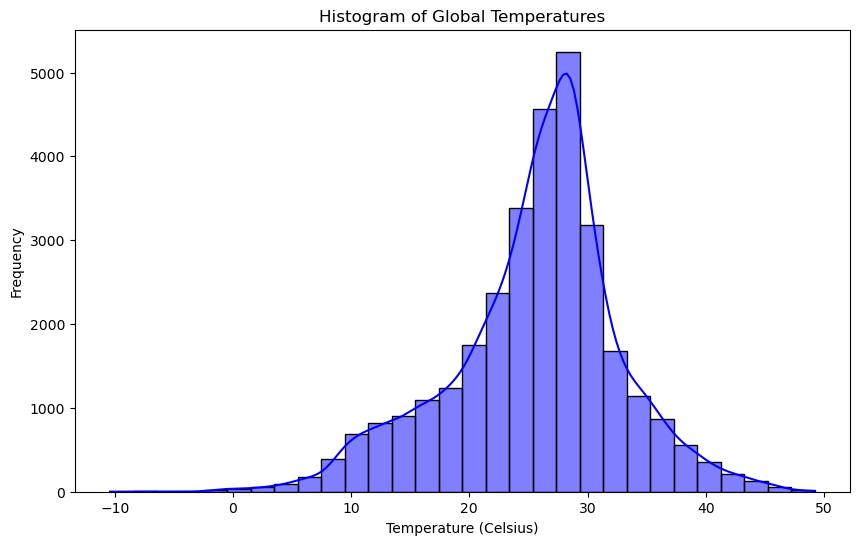

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['temperature_celsius'], bins=30, color='blue', kde=True)
plt.title('Histogram of Global Temperatures')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

### b. Line graph showing temperature changes over time for Kabul Region

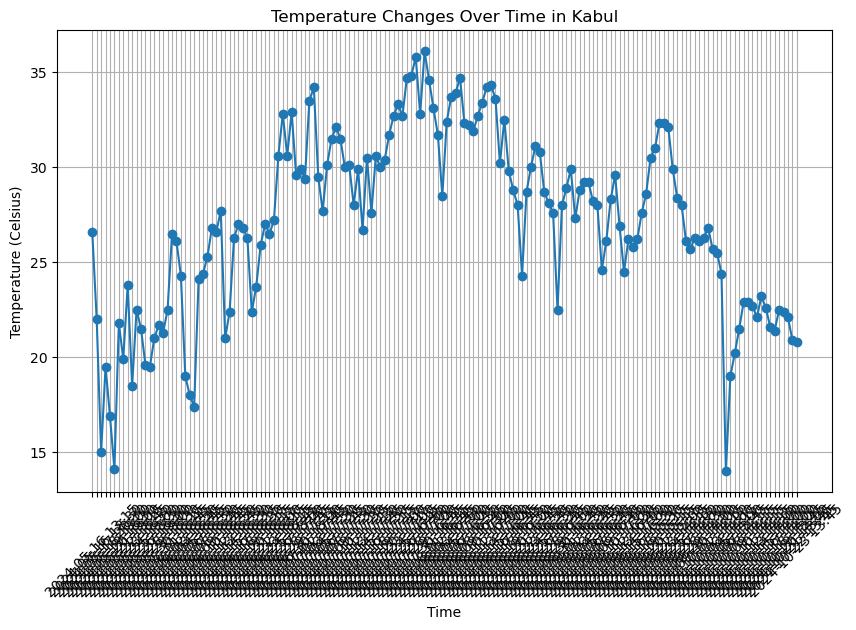

In [16]:
kabul_data = df[df['location_name'] == 'Kabul']

plt.figure(figsize=(10,6))
plt.plot(kabul_data['last_updated'], kabul_data['temperature_celsius'], marker='o')
plt.title('Temperature Changes Over Time in Kabul')
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Average air quality by country (for Carbon Monoxide levels)

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


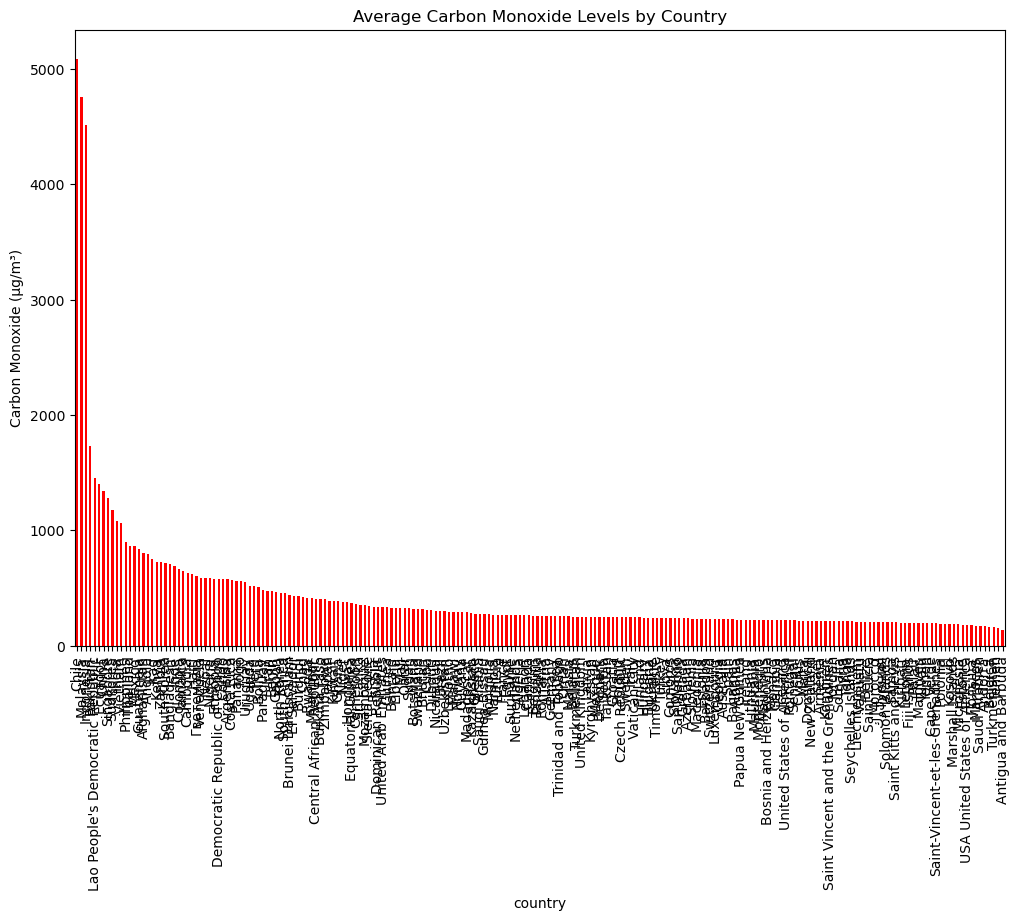

In [17]:
air_quality_by_country = df.groupby('country')['air_quality_Carbon_Monoxide'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
air_quality_by_country.plot(kind='bar', color='red')
plt.title('Average Carbon Monoxide Levels by Country')
plt.ylabel('Carbon Monoxide (µg/m³)')
plt.show()

### Group data by moon phase and calculate the average temperature for each phase

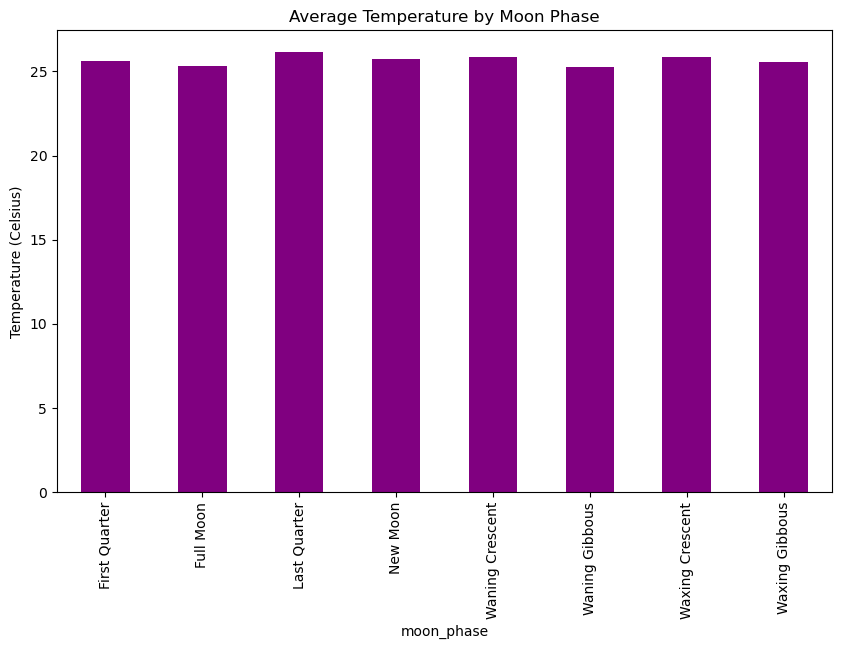

In [18]:
moon_phase_analysis = df.groupby('moon_phase')['temperature_celsius'].mean()

plt.figure(figsize=(10,6))
moon_phase_analysis.plot(kind='bar', color='purple')
plt.title('Average Temperature by Moon Phase')
plt.ylabel('Temperature (Celsius)')
plt.show()